##### Copyright 2020 The TensorFlow Hub Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [1]:
#@title Copyright 2020 The TensorFlow Hub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://www.tensorflow.org/hub/tutorials/bert_experts"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">TensorFlow.org에서 보기</a></td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/hub/tutorials/bert_experts.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Google Colab에서 실행</a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ko/hub/tutorials/bert_experts.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">GitHub에서 보기</a></td>
  <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ko/hub/tutorials/bert_experts.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">노트북 다운로드</a></td>
  <td><a href="https://tfhub.dev/s?q=experts%2Fbert"><img src="https://www.tensorflow.org/images/hub_logo_32px.png">TF Hub 모델보기</a></td>
</table>

# TF-Hub의 BERT 전문가

이 Colab에서는 다음 방법을 보여줍니다.

- MNLI, SQuAD 및 PubMed를 포함한 다양한 작업에 대해 학습된 [TensorFlow Hub](https://tfhub.dev)에서 BERT 모델 로드
- 일치하는 전처리 모델을 사용하여 원시 텍스트를 토큰화하고 이를 ID로 변환
- 로드된 모델을 사용하여 토큰 입력 ID에서 풀링 및 시퀀스 출력 생성
- 서로 다른 문장의 풀링된 출력에서 의미론적 유사성 고찰

#### 참고: 이 colab은 GPU 런타임으로 실행해야 합니다.

## 설정 및 가져오기

In [2]:
!pip install --quiet "tensorflow-text==2.8.*"

In [3]:
import seaborn as sns
from sklearn.metrics import pairwise

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text  # Imports TF ops for preprocessing.

In [4]:
#@title Configure the model { run: "auto" }
BERT_MODEL = "https://tfhub.dev/google/experts/bert/wiki_books/2" # @param {type: "string"} ["https://tfhub.dev/google/experts/bert/wiki_books/2", "https://tfhub.dev/google/experts/bert/wiki_books/mnli/2", "https://tfhub.dev/google/experts/bert/wiki_books/qnli/2", "https://tfhub.dev/google/experts/bert/wiki_books/qqp/2", "https://tfhub.dev/google/experts/bert/wiki_books/squad2/2", "https://tfhub.dev/google/experts/bert/wiki_books/sst2/2",  "https://tfhub.dev/google/experts/bert/pubmed/2", "https://tfhub.dev/google/experts/bert/pubmed/squad2/2"]
# Preprocessing must match the model, but all the above use the same.
PREPROCESS_MODEL = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

## 문장

모델을 살펴보기 위해 Wikipedia에서 몇 가지 문장을 가져와 보겠습니다.

In [5]:
sentences = [
  "Here We Go Then, You And I is a 1999 album by Norwegian pop artist Morten Abel. It was Abel's second CD as a solo artist.",
  "The album went straight to number one on the Norwegian album chart, and sold to double platinum.",
  "Among the singles released from the album were the songs \"Be My Lover\" and \"Hard To Stay Awake\".",
  "Riccardo Zegna is an Italian jazz musician.",
  "Rajko Maksimović is a composer, writer, and music pedagogue.",
  "One of the most significant Serbian composers of our time, Maksimović has been and remains active in creating works for different ensembles.",
  "Ceylon spinach is a common name for several plants and may refer to: Basella alba Talinum fruticosum",
  "A solar eclipse occurs when the Moon passes between Earth and the Sun, thereby totally or partly obscuring the image of the Sun for a viewer on Earth.",
  "A partial solar eclipse occurs in the polar regions of the Earth when the center of the Moon's shadow misses the Earth.",
]

## 모델 실행하기

TF-Hub에서 BERT 모델을 로드하고 TF-Hub에서 일치하는 전처리 모델을 사용하여 문장을 토큰화한 다음 토큰화된 문장을 모델에 입력시킵니다. 이 colab을 빠르고 간단하게 유지하려면 GPU에서 실행하는 것이 좋습니다.

**런타임** → **런타임 유형 변경**으로 이동하여 **GPU**가 선택되었는지 확인합니다.

In [6]:
preprocess = hub.load(PREPROCESS_MODEL)
bert = hub.load(BERT_MODEL)
inputs = preprocess(sentences)
outputs = bert(inputs)

In [7]:
print("Sentences:")
print(sentences)

print("\nBERT inputs:")
print(inputs)

print("\nPooled embeddings:")
print(outputs["pooled_output"])

print("\nPer token embeddings:")
print(outputs["sequence_output"])

Sentences:
["Here We Go Then, You And I is a 1999 album by Norwegian pop artist Morten Abel. It was Abel's second CD as a solo artist.", 'The album went straight to number one on the Norwegian album chart, and sold to double platinum.', 'Among the singles released from the album were the songs "Be My Lover" and "Hard To Stay Awake".', 'Riccardo Zegna is an Italian jazz musician.', 'Rajko Maksimović is a composer, writer, and music pedagogue.', 'One of the most significant Serbian composers of our time, Maksimović has been and remains active in creating works for different ensembles.', 'Ceylon spinach is a common name for several plants and may refer to: Basella alba Talinum fruticosum', 'A solar eclipse occurs when the Moon passes between Earth and the Sun, thereby totally or partly obscuring the image of the Sun for a viewer on Earth.', "A partial solar eclipse occurs in the polar regions of the Earth when the center of the Moon's shadow misses the Earth."]

BERT inputs:
{'input_word_

## 의미론적 유사성

이제 문장의 `pooled_output` 임베딩을 살펴보고 문장 전체적으로 얼마나 유사한지 비교해 보겠습니다.

In [8]:
#@title Helper functions

def plot_similarity(features, labels):
  """Plot a similarity matrix of the embeddings."""
  cos_sim = pairwise.cosine_similarity(features)
  sns.set(font_scale=1.2)
  cbar_kws=dict(use_gridspec=False, location="left")
  g = sns.heatmap(
      cos_sim, xticklabels=labels, yticklabels=labels,
      vmin=0, vmax=1, cmap="Blues", cbar_kws=cbar_kws)
  g.tick_params(labelright=True, labelleft=False)
  g.set_yticklabels(labels, rotation=0)
  g.set_title("Semantic Textual Similarity")

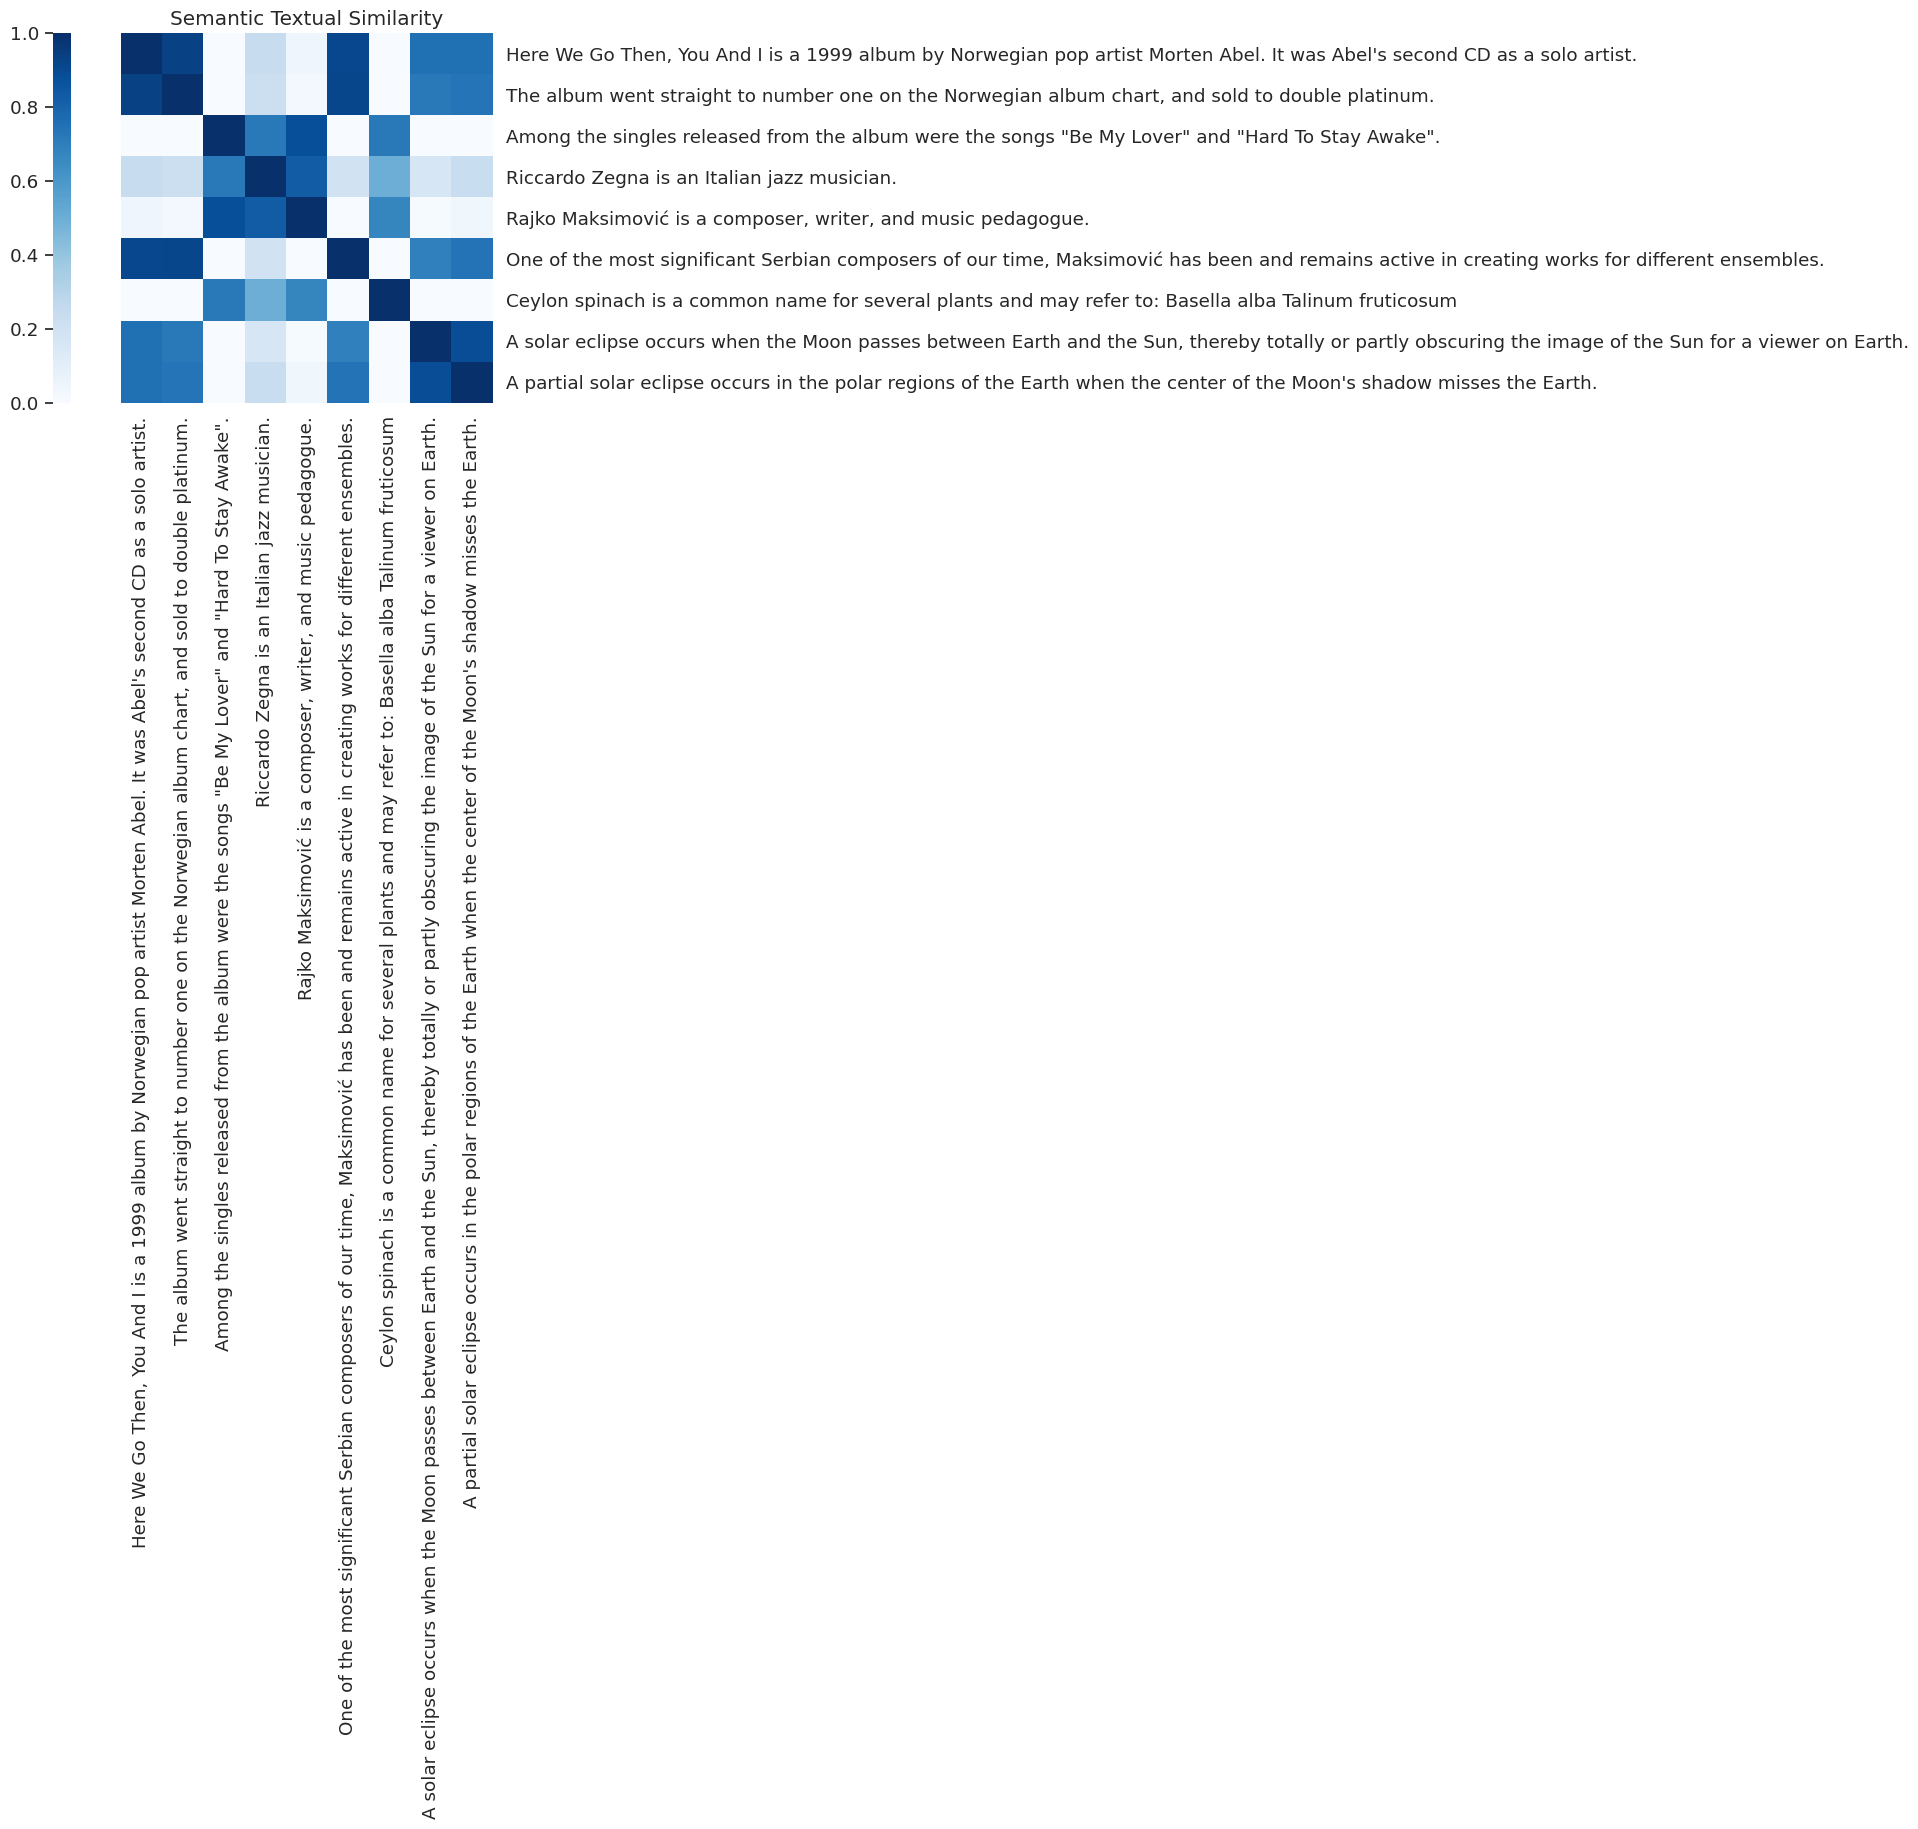

In [9]:
plot_similarity(outputs["pooled_output"], sentences)

## 자세히 알아보기

- [TensorFlow 허브](https://tfhub.dev)에서 더 많은 BERT 모델 찾기
- 이 노트북에서는 BERT를 사용한 간단한 추론을 보여줍니다. [tensorflow.org/official_models/fine_tuning_bert](https://www.tensorflow.org/official_models/fine_tuning_bert)에서 BERT 미세 조정에 관한 보다 수준 높은 튜토리얼을 찾을 수 있습니다.
- 모델을 실행하는 데 GPU 칩 하나만 사용했습니다. [tensorflow.org/tutorials/distribute/save_and_load](https://www.tensorflow.org/tutorials/distribute/save_and_load)에서 tf.distribute를 사용하여 모델을 로드하는 방법에 대해 자세히 알아볼 수 있습니다.